**Making libraries import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GridSearchCV)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

**Opening the CSV file**

In [ ]:
df = pd.read_csv('weather_classification_data.csv')

In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


**This dataset has several variables with categorical values, and target value is also**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


**Dataset has no missing values**

In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


**Printing the number of each value of each variable**

In [ ]:
for column in df.columns:
  print(df[column].value_counts(), end='\n\n')

Temperature
32.0     391
24.0     375
26.0     372
30.0     370
22.0     365
        ... 
102.0      1
86.0       1
108.0      1
87.0       1
95.0       1
Name: count, Length: 126, dtype: int64

Humidity
76     313
60     309
67     295
63     291
70     288
      ... 
100     46
102     42
109     42
103     41
101     36
Name: count, Length: 90, dtype: int64

Wind Speed
8.0     470
9.5     463
9.0     456
6.5     454
6.0     436
       ... 
40.5      2
45.5      1
46.0      1
47.5      1
48.5      1
Name: count, Length: 97, dtype: int64

Precipitation (%)
19.0     222
14.0     213
16.0     211
18.0     206
17.0     203
        ... 
104.0     41
100.0     39
106.0     38
102.0     38
105.0     37
Name: count, Length: 110, dtype: int64

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Atmospheric Pressure
1017.97    11
1017.92    11
1015.11    11
1016.31    11
1019.47    11
           ..
1028.36     1
883.59 

**Building the boxplots to find the outliers of each variable**

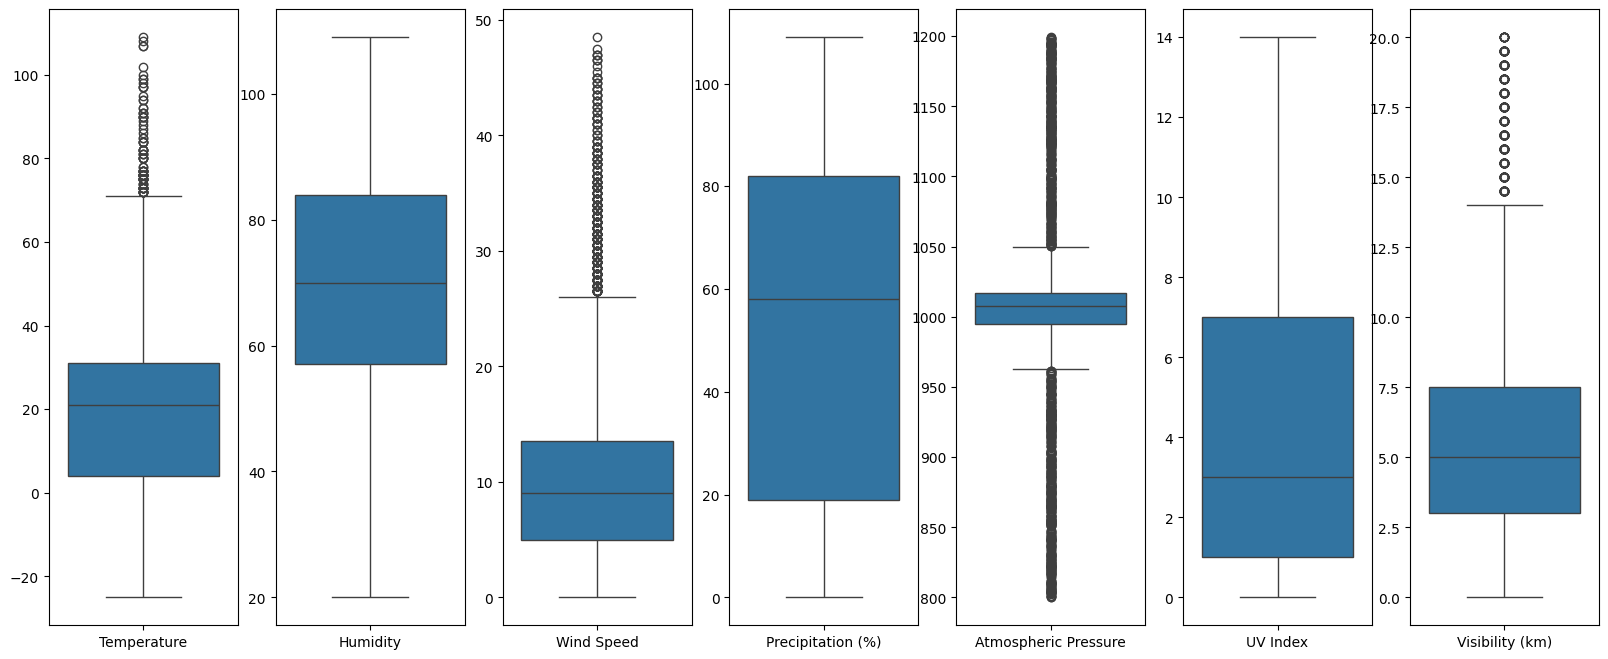

In [ ]:
num_columns = df.select_dtypes(['int64', 'float64'])
plt.figure(figsize=(20, 8))
index = 1
for column in num_columns:
  plt.subplot(1, num_columns.shape[1], index)
  sns.boxplot(df[[column]])
  index += 1

**The visualization shows that some variables have outliers**

**The visualization of the distribution of variable values below**

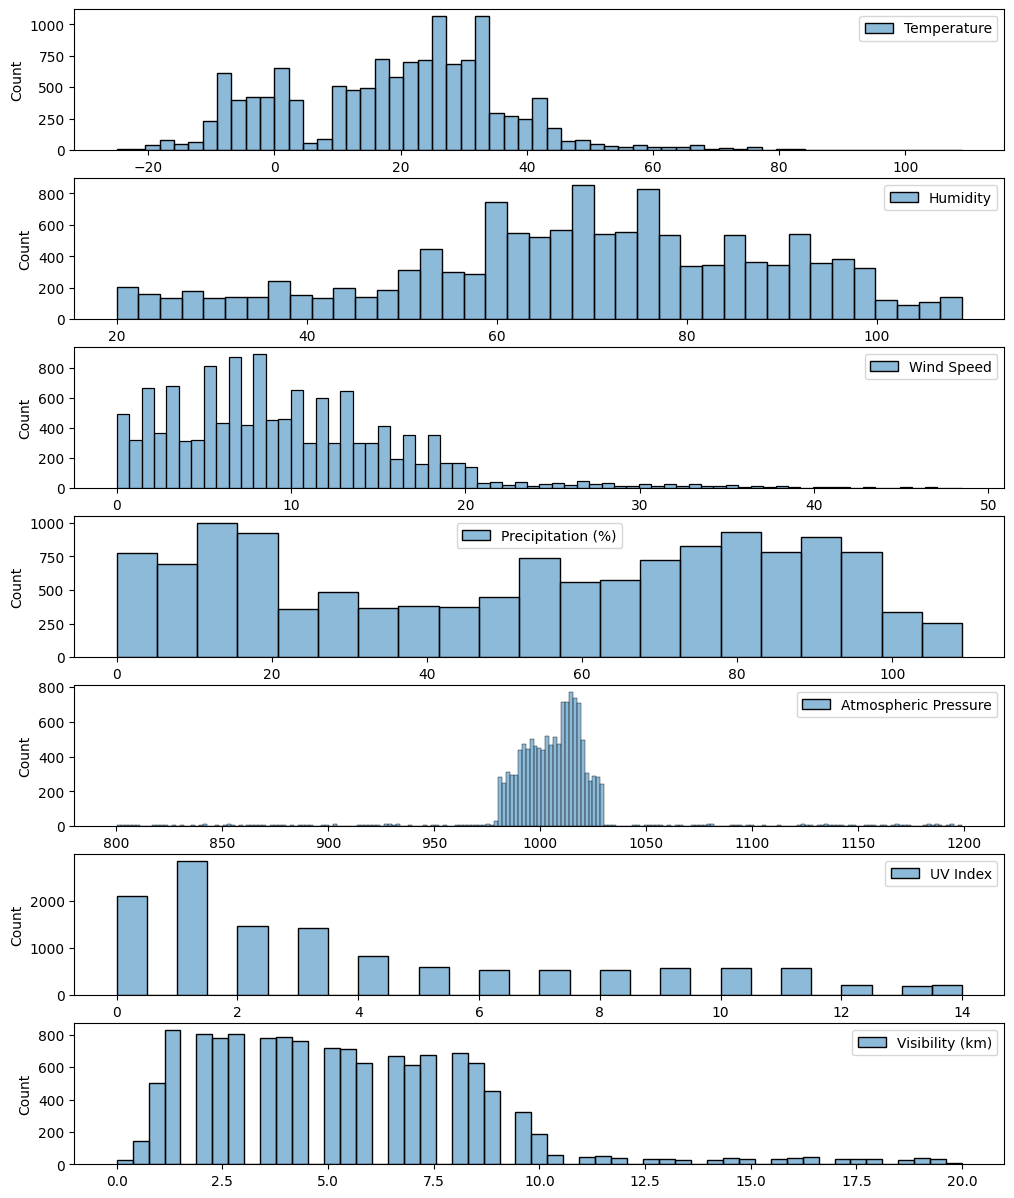

In [ ]:
num_columns = df.select_dtypes(['int64', 'float64'])
plt.figure(figsize=(12, 15))
index = 1
for column in num_columns:
  plt.subplot(num_columns.shape[1], 1, index)
  sns.histplot(df[[column]])
  index += 1

**Checking if there's duplicates in the dataset**

In [ ]:
df[df.duplicated(keep=False)]

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type


**Making a dataset copy and removing the outliers**

In [ ]:
df_copy = df.copy()
df_copy = df_copy[(df_copy['Wind Speed'] <= 25)
    & (df_copy['Temperature'] <= 70)
    & (df_copy['Humidity'] <= 100)
    & (df_copy['Precipitation (%)'] <= 100)
    & (df_copy['Atmospheric Pressure'] >= 970)
    & (df_copy['Atmospheric Pressure'] <= 1040)]

df_copy

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13194,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


**Encoding the features which has ordinal classes**

In [ ]:
categories = ['clear', 'partly cloudy', 'cloudy', 'overcast']
ordinal_enc = OrdinalEncoder(categories=[categories])
df_copy['Cloud Cover'] = ordinal_enc.fit_transform(df_copy[['Cloud Cover']]).astype('int64')
df_copy

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,1,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,3,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13194,29.0,62,13.0,17.0,3,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,3,1003.15,1,Summer,1.0,mountain,Rainy
13197,30.0,77,5.5,28.0,3,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,3,984.27,0,Winter,2.0,inland,Snowy


**Encoding other categorical features with LabelEncoder**

In [ ]:
label_enc = LabelEncoder()
cat_columns = ['Season', 'Location']
for column in cat_columns:
  df_copy[column] = label_enc.fit_transform(df_copy[column])

df_copy

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,3,3.5,1,Rainy
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,1,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,Sunny
4,27.0,74,17.0,66.0,3,990.67,1,3,2.5,2,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13194,29.0,62,13.0,17.0,3,1002.81,2,1,5.0,0,Cloudy
13195,10.0,74,14.5,71.0,3,1003.15,1,2,1.0,2,Rainy
13197,30.0,77,5.5,28.0,3,1012.69,3,0,9.0,0,Cloudy
13198,3.0,76,10.0,94.0,3,984.27,0,3,2.0,1,Snowy


**Dividing dataset into train and test samples with target values**

In [ ]:
X = df_copy.drop(['Weather Type'], axis=1)
y = df_copy['Weather Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape)

(8952, 10) (2238, 10)


**Scaling dataset to equalize significance of the features and increase the model learning speed**



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()

s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cvs = cross_val_score(estimator=log_reg, X=X_train_scaled, y=y_train, cv=s_kfold, scoring='f1_weighted')
print('Result of cross-validation: ', cvs)
print('Average result of cross-validation: ', np.mean(cvs))

Result of cross-validation:  [0.95754917 0.9598407  0.95411149 0.96427719 0.96367866]
Average result of cross-validation:  0.9598914410548179


**Also using StratifiedKfold cross-validation to check out how the dataset is able to generalize on different samples with weighted classes**

**Next is training on Logistic Regression**

In [ ]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.9593386952636282

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      Cloudy       0.93      0.94      0.94       576
       Rainy       0.95      0.96      0.95       572
       Snowy       0.99      0.98      0.98       545
       Sunny       0.98      0.96      0.97       545

    accuracy                           0.96      2238
   macro avg       0.96      0.96      0.96      2238
weighted avg       0.96      0.96      0.96      2238



In [ ]:
accuracy_score(y_train, y_pred_train)

0.9607908847184986

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      Cloudy       0.94      0.94      0.94      2271
       Rainy       0.95      0.96      0.95      2149
       Snowy       0.97      0.98      0.98      2254
       Sunny       0.98      0.96      0.97      2278

    accuracy                           0.96      8952
   macro avg       0.96      0.96      0.96      8952
weighted avg       0.96      0.96      0.96      8952



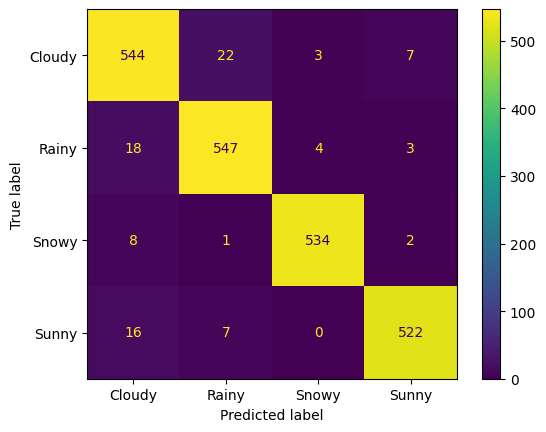

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

disp.plot()
plt.show()

**Checking out only false predicted labels**

In [ ]:
df_copy_checking = pd.DataFrame({
    'True': y_test,
    'Predicted': y_pred_test
})

df_copy_checking[y_test != y_pred_test]

,True,Predicted
4093,Rainy,Sunny
8032,Rainy,Cloudy
4728,Rainy,Cloudy
11892,Cloudy,Rainy
9676,Rainy,Snowy
...,...,...
2213,Rainy,Cloudy
2905,Sunny,Rainy
10561,Rainy,Cloudy
7153,Rainy,Snowy


In [ ]:
correct_predictions = (df_copy_checking['True'] == df_copy_checking['Predicted']).sum()
total_predictions = len(df_copy_checking)
print('The total number of incorrect predictions on the test data:', total_predictions-correct_predictions)
print('Percentage of errors:', round((total_predictions-correct_predictions)/total_predictions*100, 2), '%')

The total number of incorrect predictions on the test data: 91
Percentage of errors: 4.07 %


**Training on RandomForest model with hyperparameter selection**

In [ ]:
rfc = RandomForestClassifier()
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [2, 3, 4, 5, 7],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

search = GridSearchCV(estimator=rfc, param_grid=params, scoring='f1_weighted', verbose=3)
search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.910 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.961 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.946 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.954 total time=   0.2s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.956 total time=   0.2s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.942 total time=   0.2s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.951 total time=   0.2s
[CV 4/5]

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7, 10],
                         'n_estimators': [10, 20, 50, 100, 200]},
             scoring='f1_weighted', verbose=3)

**Taking the best parameters**

In [ ]:
search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
search.best_score_

0.9780710782301096

In [ ]:
y_pred = search.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cloudy       0.94      0.98      0.96       576
       Rainy       0.98      0.97      0.97       572
       Snowy       1.00      0.98      0.99       545
       Sunny       0.99      0.97      0.98       545

    accuracy                           0.97      2238
   macro avg       0.98      0.97      0.98      2238
weighted avg       0.98      0.97      0.98      2238



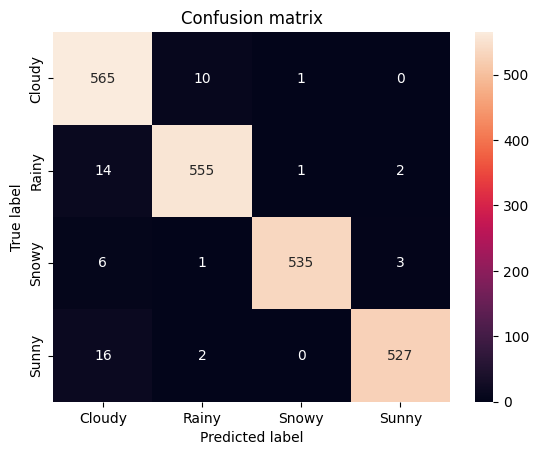

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(data=matrix, annot=True, fmt='.3g', xticklabels=search.classes_, yticklabels=search.classes_)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**As a result, Random Forest produces more correctly predicted labels**